In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

csv_colon_train_path = "../data/MedFMC_train/colon/colon_train.csv"
df = pd.read_csv(csv_colon_train_path)

In [59]:
# Add column for patient ID, by extracting the last 4 digits before the file extension
df.insert(2,  "patient_id", df['img_id'].apply(lambda x: int(x[-8:-4])))

In [60]:
# Analyze CSV
columns = df.columns.tolist()
print(f"Columns: {len(columns)} ({columns})")
print(f"Rows: {len(df)}")

unique_slide_ids = df["slide_id"].unique()
print(f"Unique slide IDs: {len(unique_slide_ids)}")

unique_img_ids = df["img_id"].unique()
print(f"Unique image IDs: {len(unique_img_ids)}")

unique_patient_ids = df["patient_id"].unique()
print(f"Unique patient IDs: {len(unique_patient_ids)}")

Columns: 4 (['slide_id', 'img_id', 'patient_id', 'tumor'])
Rows: 5654
Unique slide IDs: 388
Unique image IDs: 5654
Unique patient IDs: 318


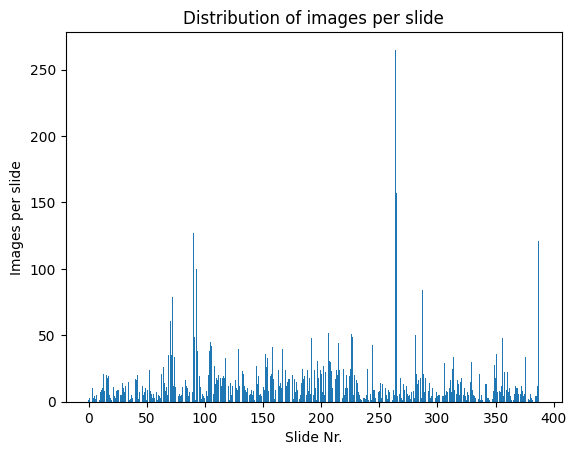

Images per slide ranging from 1 to 265 with a median of 9


In [37]:
# Analyze number of images per slide
image_counts = np.array(df.groupby('slide_id')['img_id'].count().tolist())

fix, ax = plt.subplots()
ax.set_xlabel("Slide Nr.")
ax.set_ylabel("Images per slide")
ax.set_title("Distribution of images per slide")
plt.bar(range(len(image_counts)), image_counts)
plt.show()

print(f"Images per slide ranging from {np.min(image_counts)} to {np.max(image_counts)} with a median of {int(np.median(image_counts))}")

[210 207 203 216 202 195 186 174 177 145 161 141 155 141 135 144 123 117
 121 105  98  93  85  88  78  72  68  68  66  53  51  54  51  49  45  42
  46  44  41  37  38  26  29  33  26  28  24  20  23  20  18  21  15  21
  21  19  17  18  16  16  19  11  16  11  13  11  10  12   8  11  10   8
  13  12  12   8  12  10  10   9   8  11   7   6   5   9   6   7   6   6
   6   6   6   5   5   6   7   4   5   6   4   6   4   4   3   5   4   4
   5   5   3   3   4   4   3   5   4   4   3   3   5   3   3   2   4   5
   3   3   1   3   2   2   3   3   2   3   1   1   1   2   2   1   2   1
   2   1   1   2   2   2   2   1   2   1   1   1   1   1   1   1   2   1
   1   2   1   1   1   1   1   2   1   1   1   1   1   1   1   2   1   1
   2   1   1   2   2   1   2   2   1   1   2   1   2   2   1   1   2   2
   2   2   1   1   1   1   2   2   1   2   1   1   2   2   2   2   2   2
   1   2   2   2   1   1   1   2   1   1   2   1   2   1   2   1   1   2
   1   1   1   2   2   1   2   2   2   1   2   2   

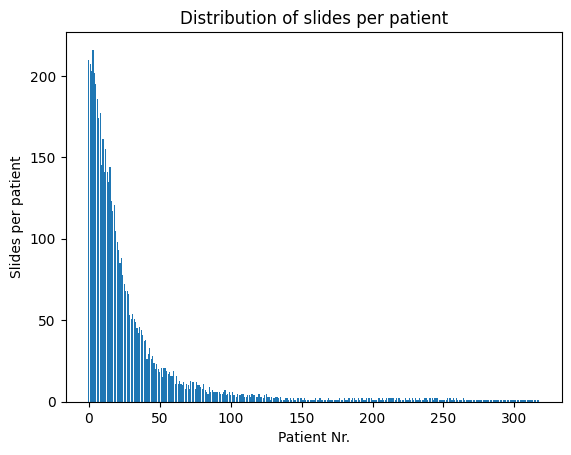

Slides per patient ranging from 1 to 216 with a median of 2


In [64]:
# Analyze number of slides per patient, ASSUMING "p0022" stands for patient 0022
slide_counts = np.array(df.groupby('patient_id')['slide_id'].nunique().tolist())
print(slide_counts)

fix, ax = plt.subplots()
ax.set_xlabel("Patient Nr.")
ax.set_ylabel("Slides per patient")
ax.set_title("Distribution of slides per patient")
plt.bar(range(len(slide_counts)), slide_counts)
plt.show()

print(f"Slides per patient ranging from {np.min(slide_counts)} to {np.max(slide_counts)} with a median of {int(np.median(slide_counts))}")

In [65]:
# Check if certain slide IDs are associated with multiple patient IDs
unique_patients_per_slide = df.groupby('slide_id')['patient_id'].nunique()
shared_slide_ids = unique_patients_per_slide[unique_patients_per_slide > 1]
print(shared_slide_ids)

slide_id
1800127001_2019-04-30 10_40_02-lv1-4386-16301-2230-4582            3
1800127001_2019-04-30 10_40_02-lv1-6892-18147-4571-3989           10
1800127001_2019-04-30 10_40_02-lv1-7573-15422-4121-2549            3
1800769002_2019-06-11 13_32_47-lv1-36878-15878-2411-4096           4
1800769002_2019-06-11 13_32_47-lv1-37227-12624-3370-2527           2
                                                                ... 
D20190399101_2019-06-10 14_34_19-lv1-20934-28904-6720-5415        38
D20190445003_2019-06-10 14_30_16-lv1-17239-5355-2025-3631          4
D20190445003_2019-06-10 14_30_16-lv1-19280-4446-1982-3545          4
D20190445103_2019-06-10 14_26_02-lv1-16400-15396-5392-7030        12
F2018_13446_1-1_2019-02-20 21_33_15-lv1-13171-109-16054-13821    121
Name: patient_id, Length: 362, dtype: int64
